Verion notes - 
version: 2.15
- updated the corelation calculation to a function to return all by category

The code was re-structured to cover the main objective and the additional work separately. Also I have added some section IDs to cater for the project scope:

section id - task:
1 - Libs and functions
    1.1 - Libs imports
    1.2 - Average calculator function
    1.3 - Date Calculation
2 - Load Dataset
    2.1 - load_dataset() - QWASAR#1
    2.2 - Standardise headers / replace spaces
3 - Base Analysis - Cleaning
    3.1 - print_summarize_dataset - QWASAR#2
    3.2 - Show the unique values per columns
    3.3 - Add zero to the null rating values
    3.4 - Cleaning the dataset - QWASAR#3
    3.5 - Dataframe separation for Paid | Free | Total
4 - Analysis of the dataset
    4.1 - Free|Paid split pie
    4.2 - Total Market size
    4.3 - Print summarized dataset
        => this one is there in 3.1
    4.4 - Total Value Summary
        => use mean for price instead of sum
    4.5 - Print historams - QWASAR#4
    4.6 - Compute Correlation Matrix - QWASAR#5
    4.7 - Scatter Matrix - QWASAR#6
5 - Summary of the analysis
    5.1 - Plot most popular apps - QWASAR BLOG#1
        5.1.1 - Plot with bar diagram the most populars paid apps of Family category by installs
        5.1.2 - Plot with bar diagram the most populars paid apps of Family category by rate
    5.2 - Plot with a pie diagram the most popular genres according to the number of installations from paid family - QWASAR BLOG#2
    5.3 - Download Ratio - QWASAR BLOG#3
    5.4 - Size of Market pie - QWASAR BLOG#4
        5.4.1 - Size of Market pie all
        5.4.2 - Size of Market pie paid
    5.5 - Mean Price bar - QWASAR BLOG#5
        5.5.1 - Mean Price bar Paid
        5.5.2 - Mean Price bar All
    5.6 - Most expensive apps per category - QWASAR BLOG#6
6 - Additional considerations
    6.1 - Numeric Assignment of categories
    6.2 - Time Factor

1 - Libs and functions

In [180]:
#1.1 - Libs imports

import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix
import seaborn as sns
from datetime import date, datetime

In [181]:
#1.2 - Average calculator function

def average_calculator(a,b):
    if a == 0 or b == 0:
        return 0
    else:
        b_a = abs((a-b)/b)/100
        a_b = abs((b-a)/a)
        return (b_a,a_b)

In [182]:
#1.3 - Date Calculation: calcualte the maintenance delay of the application based on the last updated date (assumption is the longer the app was updated the least it is in support)

def maint_del(date):
    date = datetime.strptime(date, "%B %d, %Y").date()
    today = date.today()
    delay = today.year - date.year - ((today.month, today.day) < (date.month, date.day)) #delay since last update
    return delay

def maint_year(date):
    date = datetime.strptime(date, "%B %d, %Y").date()
    year = date.year
    return year
    

2 - Load Dataset
First will be your notebook jupyter with your calculation You will have to implement multiple functions:

In [183]:
#2.1 - load_dataset()

def load_dataset(dataset):
    dataset = pd.read_csv("googleplaystore.csv",index_col=None)
    dataset = dataset.drop(index=0)
    return dataset

source = "googleplaystore.csv"
nohead_raw_dataset = load_dataset(source)
nohead_raw_dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [184]:
#2.2 - Standardise headers / replace spaces

def headers(df):
    df.rename(columns={'Content Rating':'Content_Rating','Last Updated':'Last_Updated','Current Ver':"Current_Ver",'Android Ver':"Android_Ver"},inplace=True)
    return df

raw_dataset = headers(nohead_raw_dataset)
raw_dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [185]:
#raw_dataset[raw_dataset["App"].str.contains('Minecraft')]
#raw_dataset[raw_dataset["Type"].str.contains('Paid|Free')==False]

3 - Analysis (Base) - Cleaning

In [186]:
#3.1 - print_summarize_dataset
def print_summarize_dataset(dataset):
    print(f"Describe Dataset:\n {dataset.describe()}\n")
    print(f"Dataset Information:\n {dataset.info()}\n")
    print(f"Dataset Count distinct:\n {dataset.nunique()}\n")
    print(f"Null records count: {dataset.isnull().sum()}")

print_summarize_dataset(raw_dataset)

Describe Dataset:
             Rating
count  9366.000000
mean      4.193348
std       0.537459
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 1 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content_Rating  10839 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10832 non-null  object 
 12  Android_Ver     10837 non-null  object 
dtypes: float64(1), objec

In [187]:
#3.2 - Show the unique values per columns
def unique_values(df):
    cat = df['Category'].unique()
    type = df['Type'].unique()
    com_rat = df['Content_Rating'].unique()
    df[['Genres1','Genres2']] = df['Genres'].str.split(';',1,expand=True)
    genr1 = df['Genres1'].unique()
    genr2 = df['Genres2'].unique()
    return cat, type, com_rat, genr1, genr2

unique_labels = unique_values(raw_dataset)
unique_labels

(array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
        'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
        'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
        'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
        'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
        'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
        'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
        'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
        '1.9'], dtype=object),
 array(['Free', 'Paid', nan, '0'], dtype=object),
 array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
        'Adults only 18+', 'Unrated', nan], dtype=object),
 array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
        'Business', 'Comics', 'Communication', 'Dating', 'Education',
        'Entertainment', 'Events', 'Finance', 'Food & Drink',
        'Health & Fitness', 'House & Home

In [188]:
#3.3 - Add zero to the null rating values
def rating_fix(df):
    df['Rating'] = df['Rating'].fillna(0)
    return df

raw_dataset = rating_fix(raw_dataset)
raw_dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Genres1,Genres2
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Art & Design,None


Analysis of the dataset - cleaning, summary, basic information

In [189]:
#3.4 - Cleaning the dataset
#clean the dataset for assessment: corelations - leaving only int in the dataframe
#keep: Rating, Reviews, Size, Installs, Price
#clean_dataset

def clean_dataset(df_in):
    df = df_in
    #clean int fields from unvanted chars
    df['Size'] = df['Size'].replace({'\D+':'0'},regex=True)
    df['Installs'] = df['Installs'].replace({'\D+':'0'},regex=True)
    df['Reviews'] = df['Reviews'].replace({'\D+':'0'},regex=True)
    df['Price'] = df['Price'].replace({'\D+':'0'},regex=True)
    df = df.astype({'Reviews':'int','Size':'int','Installs':'int64','Price':'int'})
    df['Installs'] = df['Installs']

    #Remove duplicated apps - after checking the dataframe, there are some (i.e.: Minecraft both identical)
    df = df.drop_duplicates(subset=['App'])
    
    #clean the corrupt rows in the dataframe
    df = df.drop(df[df["Type"].str.contains('Paid|Free')==False].index,inplace=False)

    return df

combined_dataset = clean_dataset(raw_dataset)
combined_dataset.head(5)
#combined_dataset.dtypes

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Genres1,Genres2
1,Coloring book moana,ART_AND_DESIGN,3.9,967,140,50000000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8070,5000000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,250,50000000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2080,10000000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5060,5000000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Art & Design,None


In [190]:
#combined_dataset[combined_dataset["App"].str.contains('Minecraft')]

In [191]:
#3.5 - Dataframe separation for Paid | Free | Total
#create new datasets for paid only, free only and full datasets
def paid(df):
    df2 = df[df['Type'].astype(str).str.contains('Paid')]
    return df2

def free(df):
    df2 = df[df['Type'].astype(str).str.contains('Free')]
    return df2

free_dataset = free(combined_dataset)
paid_dataset = paid(combined_dataset)

print(f"Paid#: {paid_dataset.shape[0]}\nFree#: {free_dataset.shape[0]}\nTotal: {combined_dataset.shape[0]}")

Paid#: 756
Free#: 8901
Total: 9658


4 - Analysis of the dataset

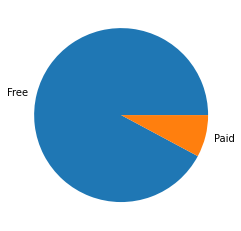

In [192]:
#4.1 - Free|Paid split pie
def plot_type(df):
    pop_pie = df.groupby('Type',as_index=False).count()
    pop_pie = pop_pie[['Type','Installs']]
    pop_pie = pop_pie.nlargest(n=2, columns=['Installs'])
    pyplot.pie(pop_pie['Installs'],labels=pop_pie['Type'])

plot_type(combined_dataset)

In [193]:
#4.2 - Total Market size
#sum total market size, by price -> CHECK VALUES AS NOT MATCHING WITH THE SUMMARY TABLE 
def size_of_market(df):
    print(f"Total market asset value: {(df['Price'].sum()/1_000_000):0.2f} mn $")
    print(f"Total market sales value (quad): {((df['Price']*df['Installs']).sum()/1_000_000_000_000_000):0.2f} quad $")
    print(f"Total number of installs: {(combined_dataset['Installs'].sum()/1_000_000):0.2f}")
    df_fam = df.query("Category == 'FAMILY'")
    print(f"Family category asset value: {(df_fam['Price'].sum()/1_000_000):0.2f} mn $")
    print(f"Family category sales value (quad): {((df_fam['Price']*df_fam['Installs']).sum()/1_000_000_000_000_000):0.2f} quad $")
    print(f"Family category of installs: {(df_fam['Installs'].sum()/1_000_000):0.2f}")
    
size_of_market(paid_dataset)

Total market asset value: 10.02 mn $
Total market sales value (quad): 0.11 quad $
Total number of installs: 254762070.30
Family category asset value: 2.25 mn $
Family category sales value (quad): 0.07 quad $
Family category of installs: 15564.46


In [194]:
#4.3 - Print summarized dataset
def print_summarize_dataset(df):
    print(df.describe())

print_summarize_dataset(combined_dataset)

            Rating       Reviews          Size      Installs          Price
count  9658.000000  9.658000e+03   9658.000000  9.658000e+03    9658.000000
mean      3.541085  2.166150e+05   1929.644854  2.637835e+10    1036.965521
std       1.575804  1.831413e+06   2594.196845  4.552883e+11   16805.062731
min       0.000000  0.000000e+00      0.000000  0.000000e+00       0.000000
25%       3.600000  2.500000e+01    170.000000  1.000000e+05       0.000000
50%       4.200000  9.670000e+02    460.000000  1.000000e+07       0.000000
75%       4.500000  2.940800e+04   3060.000000  1.000000e+09       0.000000
max       5.000000  7.815831e+07  10200.000000  1.000000e+13  400000.000000


In [195]:
#4.4 - Total Value Summary: Print the total values by category in percentages
def cat_split(df_cl):
    #df_cl['Value'] = df_cl['Price']*df_cl['Installs']
    df_cl = df_cl[['Category','Price','Installs','Rating','Reviews']]
    df = df_cl.groupby(['Category']).sum()
    df['Installs Share'] = (df[['Installs']]/df_cl['Installs'].sum())*100
    df['Installs Share'] = round(df['Installs Share'],3)
    df['Asset Value'] = (df[['Price']]/df_cl['Price'].sum())*100
    df['Asset Value'] = round(df['Asset Value'],3)
    df['Revirews Share'] = (df[['Reviews']]/df_cl['Reviews'].sum())*100
    df['Revirews Share'] = round(df['Revirews Share'],3)
    #df['Value'] = df['Price']*df['Installs']
    df['Value_Share'] = ((df['Price']*df['Installs'])/(df['Price']*df['Installs']).sum())*100
    df['Revirews Share'] = round(df['Revirews Share'],3)
    df = df.sort_values(by=['Installs'], ascending=False)
    
    #Value formatting
    df['Price'] = pd.Series(["${0:.2f} mn".format(val/1_000_000) for val in df['Price']], index = df.index)
    df['Installs'] = pd.Series(["{0:.2f} mn".format(val/1_000_000) for val in df['Installs']], index = df.index)
    df['Reviews'] = pd.Series(["{0:.2f} k".format(val/1_000) for val in df['Reviews']], index = df.index)
    df['Revirews Share'] = pd.Series(["{0:.2f}%".format(val) for val in df['Revirews Share']], index = df.index)
    df['Asset Value'] = pd.Series(["{0:.2f}%".format(val) for val in df['Asset Value']], index = df.index)
    df['Installs Share'] = pd.Series(["{0:.2f}%".format(val) for val in df['Installs Share']], index = df.index)
    #df['Value'] = pd.Series(["${0:.2f} qs".format(val/1_000_000_000_000_000) for val in df['Value']], index = df.index)
    df['Value_Share'] = pd.Series(["{0:.2f}%".format(val) for val in df['Value_Share']], index = df.index)
    return df

cat_split_dataset = cat_split(paid_dataset)
cat_split_dataset.head(10)

,Price,Installs,Rating,Reviews,Installs Share,Asset Value,Revirews Share,Value_Share
Category,,,,,,,,
GAME,$0.21 mn,18299.82 mn,332.3,1572.85 k,43.85%,2.14%,23.84%,9.32%
FAMILY,$2.25 mn,15564.46 mn,659.7,3632.57 k,37.30%,22.47%,55.07%,83.07%
PERSONALIZATION,$0.09 mn,2125.45 mn,289.1,293.15 k,5.09%,0.91%,4.44%,0.46%
PHOTOGRAPHY,$0.10 mn,1087.81 mn,60.2,115.23 k,2.61%,1.03%,1.75%,0.27%
TOOLS,$0.20 mn,1072.34 mn,262.7,171.94 k,2.57%,2.05%,2.61%,0.52%
COMMUNICATION,$0.06 mn,1035.82 mn,89.4,84.21 k,2.48%,0.62%,1.28%,0.15%
SPORTS,$0.08 mn,1024.31 mn,93.6,150.63 k,2.45%,0.82%,2.28%,0.20%
LIFESTYLE,$2.35 mn,1017.90 mn,76.5,47.42 k,2.44%,23.43%,0.72%,5.66%
PRODUCTIVITY,$0.23 mn,141.11 mn,75.7,171.72 k,0.34%,2.29%,2.60%,0.08%


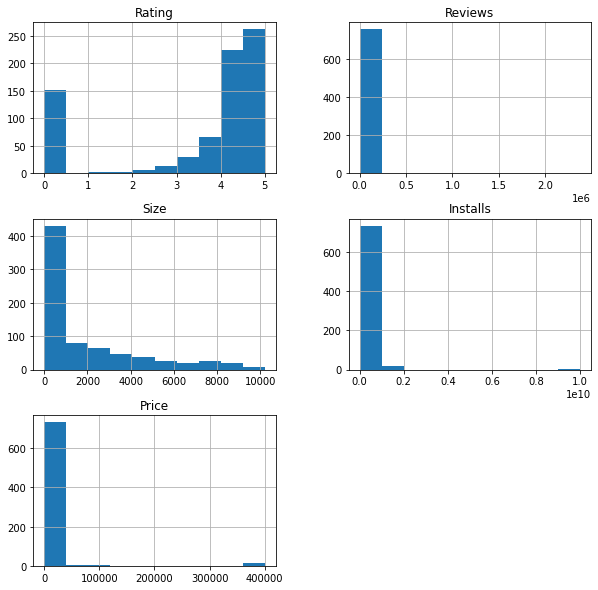

In [196]:
#4.5 - Print historams
def print_histograms(df):
    df.hist(figsize=[10,10])
    pyplot.show()

print_histograms(paid_dataset)

30
{'Rating': 0.4311156138432764, 'Reviews': 0.993990303041093, 'Size': 0.15800189984014054, 'Installs': 1.0, 'Price': -0.19909796172863423}


AttributeError: module 'matplotlib' has no attribute 'title'

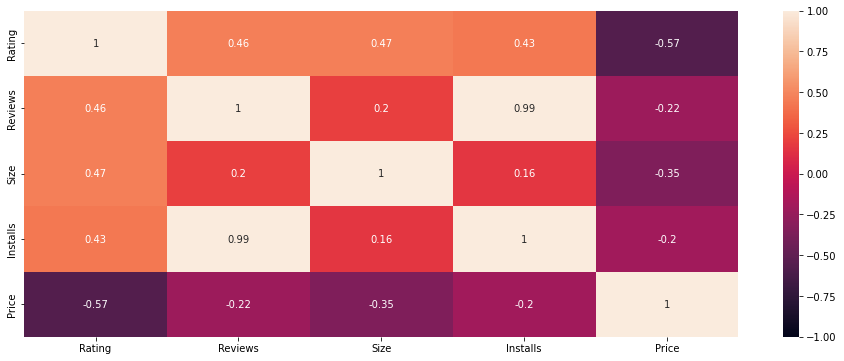

In [198]:
#4.6 - Compute Correlation Matrix: calculate the pearsons correlation coeficient of the dataset:
def compute_correlations_matrix(df,cat):
    category = cat    
    df_fam = df.query("Category == @category")
    corr_df_fam = df_fam.corr()
    corelations_fam = corr_df_fam.to_dict(orient='dict')
    print(corelations_fam['Installs'])
    pyplot.figure(figsize=(16, 6))
    sns.heatmap(corr_df_fam, vmin=-1, vmax=1, annot=True)
    plt.title(f'%s')

def correlations_matrix_call(df):
    cat = df['Category'].unique()
    print(len(cat))
    for i in range(len(cat)):
        compute_correlations_matrix(df,cat[i])
    

#compute_correlations_matrix(paid_dataset)
correlations_matrix_call(paid_dataset)

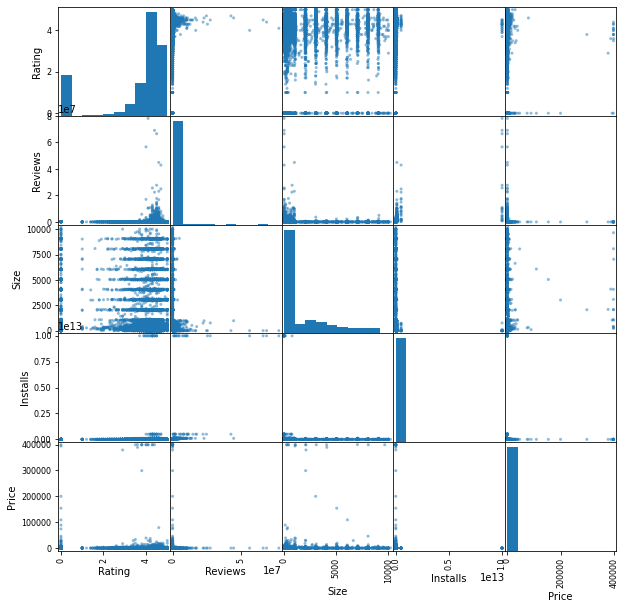

In [ ]:
#4.7 - Scatter Matrix
def print_scatter_matrix(df):
    pd.plotting.scatter_matrix(df,figsize=([10,10]))

print_scatter_matrix(combined_dataset)

5 - Summary of the analysis

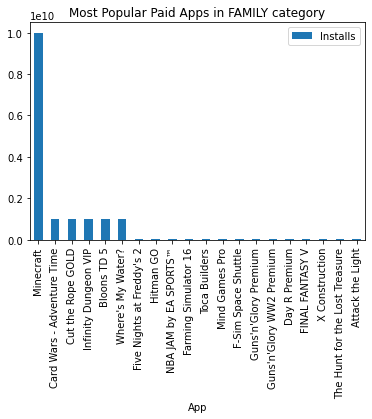

In [ ]:
#5.1.1 - Plot with bar diagram the most populars paid apps of Family category by installs
def popular_bar_inst(df):
    df_bar = df.query("Category == 'FAMILY'")
    df_bar = df_bar[['App','Installs']]
    df_bar = df_bar.nlargest(n=20, columns=['Installs'])
    df_bar.plot(x = 'App', y='Installs', title='Most Popular Paid Apps in FAMILY category', kind='bar') 

popular_bar_inst(paid_dataset)

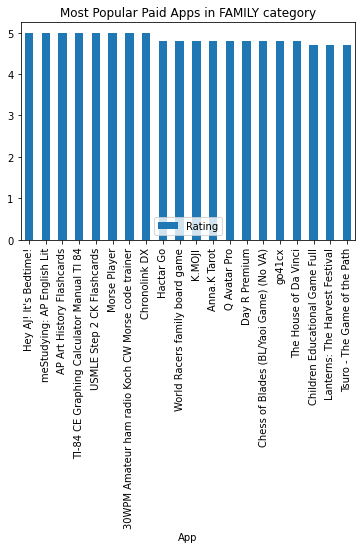

In [ ]:
#5.1.2 - Plot with bar diagram the most populars paid apps of Family category by rate
def popular_bar_rate(df):
    df_bar = df.query("Category == 'FAMILY'")
    df_bar = df_bar[['App','Rating']]
    df_bar = df_bar.nlargest(n=20, columns=['Rating'])
    df_bar.plot(x = 'App', y='Rating', title='Most Popular Paid Apps in FAMILY category', kind='bar') 

popular_bar_rate(paid_dataset)

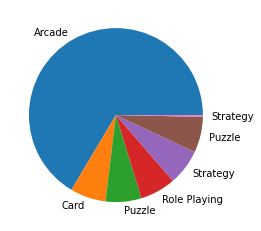

In [ ]:
#5.2 - Plot with a pie diagram the most popular genres according to the number of installations from paid family

def popular_piechart(df):
    pop_pie = df.query("Category == 'FAMILY'")
    pop_pie = pop_pie[['Genres1','Installs']]
    pop_pie = pop_pie.nlargest(n=7, columns=['Installs'])
    pyplot.pie(pop_pie['Installs'],labels=pop_pie['Genres1'])

popular_piechart(paid_dataset)

#combined_dataset_dated

In [ ]:
#5.3 - Download Ratio: Depending on each category, what are the ratio of download per app?: An array with the number of installation per category
def download_ratio(df):
    df_ipc = df[['Category','Installs']]
    df_ipc = df_ipc.groupby(['Category'],as_index=False).sum()
    ipc_array = df_ipc.to_numpy()
    return ipc_array

downl_ratio = download_ratio(combined_dataset)
print(downl_ratio)

[['ART_AND_DESIGN' 109532801000]
 ['AUTO_AND_VEHICLES' 48512822110]
 ['BEAUTY' 23419610500]
 ['BOOKS_AND_REFERENCE' 10656096455760]
 ['BUSINESS' 689814608650]
 ['COMICS' 41398101500]
 ['COMMUNICATION' 65031726792510]
 ['DATING' 130191881070]
 ['EDUCATION' 344895200000]
 ['ENTERTAINMENT' 11111266000000]
 ['EVENTS' 14196941610]
 ['FAMILY' 4351489785050]
 ['FINANCE' 443334087340]
 ['FOOD_AND_DRINK' 206579717510]
 ['GAME' 22838491594150]
 ['HEALTH_AND_FITNESS' 1127801665120]
 ['HOUSE_AND_HOME' 91621204610]
 ['LIBRARIES_AND_DEMO' 48499509100]
 ['LIFESTYLE' 490481045390]
 ['MAPS_AND_NAVIGATION' 500328018900]
 ['MEDICAL' 27217681770]
 ['NEWS_AND_MAGAZINES' 11362721257600]
 ['PARENTING' 28352101100]
 ['PERSONALIZATION' 1520348327820]
 ['PHOTOGRAPHY' 13640914346550]
 ['PRODUCTIVITY' 14782208113690]
 ['SHOPPING' 1390134357850]
 ['SOCIAL' 32478986349020]
 ['SPORTS' 1085246774980]
 ['TOOLS' 16977674949150]
 ['TRAVEL_AND_LOCAL' 20888688341460]
 ['VIDEO_PLAYERS' 21923389937200]
 ['WEATHER' 356509915

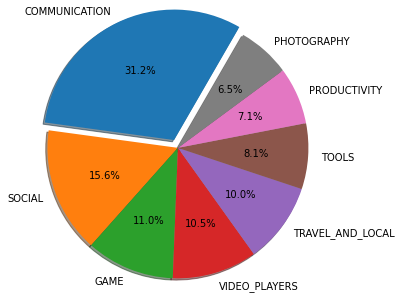

In [ ]:
#5.4.1 - Size of Market pie all: What is the size of the market: Plot a pie with the number of installation per category # & %
def mark_size(df):
    df_m_size = df[['Category','Installs']]
    df_m_size = df_m_size.groupby(['Category'],as_index=False).sum()
    m_size_pie = df_m_size.nlargest(n=8, columns=['Installs'])
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    pyplot.pie(m_size_pie['Installs'],labels=m_size_pie['Category'],explode=explode,autopct='%1.1f%%',shadow=True, startangle=60, radius=1.5)
    

mark_size(combined_dataset)

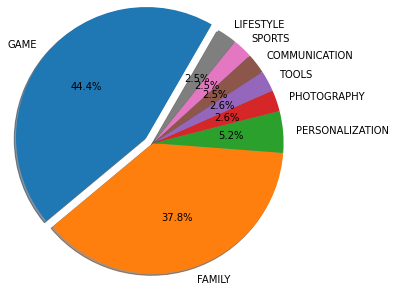

In [ ]:
#5.4.2 - Size of Market pie paid
mark_size(paid_dataset)

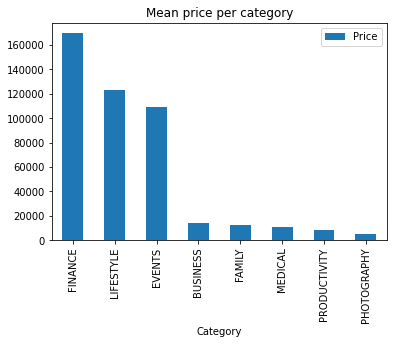

In [ ]:
#5.5.1 - Mean Price bar Paid: What is the size of the market: Plot a bar with the mean price per category # & %
def mark_price(df):
    df_m_price = df[['Category','Price']]
    df_m_price = df_m_price.groupby(['Category'],as_index=False).mean()
    m_price_bar = df_m_price.nlargest(n=8, columns=['Price'])
    m_price_bar.plot(x = 'Category', y='Price', title='Mean price per category', kind='bar')
    

mark_price(paid_dataset)


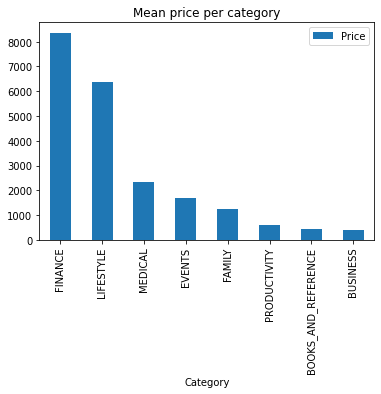

In [ ]:
#5.5.2 - Mean Price bar All
mark_price(combined_dataset)

In [ ]:
#5.6 - Most expensive apps per category
def max_price(df):
    df_price_max = df[['Category','Price']]
    df_max = df_price_max.groupby('Category',as_index=False).max()
    return df_max
    

max_price(paid_dataset)

,Category,Price
0,ART_AND_DESIGN,1099
1,AUTO_AND_VEHICLES,9099
2,BOOKS_AND_REFERENCE,6049
3,BUSINESS,89099
4,COMMUNICATION,19099
5,DATING,7099
6,EDUCATION,5099
7,ENTERTAINMENT,4099
8,EVENTS,109099
9,FAMILY,399099


6 - Additional considerations

In [ ]:
#6.1 - Numeric Assignment of categories: Create unified numeric assignment to find corelations
def label_numerate(df):
    df['Category_Num'] = df['Category'].astype('category')
    df['Category_Num'] = df['Category_Num'].cat.codes
    df['Type_Num'] = df['Type'].astype('category')
    df['Type_Num'] = df['Type_Num'].cat.codes
    df['Content_Rating_Num'] = df['Content_Rating'].astype('category')
    df['Content_Rating_Num'] = df['Content_Rating_Num'].cat.codes
    df['Genres1_Num'] = df['Genres1'].astype('category')
    df['Genres1_Num'] = df['Genres1_Num'].cat.codes
    df['Genres2_Num'] = df['Genres2'].astype('category')
    df['Genres2_Num'] = df['Genres2_Num'].cat.codes

    #change number categories to int
    df['Category_Num'] = df['Category_Num'].astype('int')
    df['Type_Num'] = df['Type_Num'].astype('int')
    df['Content_Rating_Num'] = df['Content_Rating_Num'].astype('int')
    df['Genres1_Num'] = df['Genres1_Num'].astype('int')
    df['Genres2_Num'] = df['Genres2_Num'].astype('int')

    df = df[['Category_Num','Category','Type_Num','Type','Genres1_Num','Genres2_Num','Genres1','Genres2','App','Price','Installs','Rating','Reviews','Content_Rating_Num','Content_Rating','Last_Updated']]
    return df

enumerated_dataset = label_numerate(combined_dataset)#fix paid and free
enumerated_dataset.head(5)

,Category_Num,Category,Type_Num,Type,Genres1_Num,Genres2_Num,Genres1,Genres2,App,Price,Installs,Rating,Reviews,Content_Rating_Num,Content_Rating,Last_Updated
1,0,ART_AND_DESIGN,0,Free,3,5,Art & Design,Pretend Play,Coloring book moana,0,50000000,3.9,967,1,Everyone,"January 15, 2018"
2,0,ART_AND_DESIGN,0,Free,3,-1,Art & Design,None,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,5000000000,4.7,87510,1,Everyone,"August 1, 2018"
3,0,ART_AND_DESIGN,0,Free,3,-1,Art & Design,None,Sketch - Draw & Paint,0,50000000000,4.5,215644,4,Teen,"June 8, 2018"
4,0,ART_AND_DESIGN,0,Free,3,2,Art & Design,Creativity,Pixel Draw - Number Art Coloring Book,0,10000000,4.3,967,1,Everyone,"June 20, 2018"
5,0,ART_AND_DESIGN,0,Free,3,-1,Art & Design,None,Paper flowers instructions,0,5000000,4.4,167,1,Everyone,"March 26, 2017"


C:\Users\vikto\AppData\Local\Temp\ipykernel_23176\2194721861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['Upd_Delay'] = df['Last_Updated'].apply(maint_del).astype(int)
C:\Users\vikto\AppData\Local\Temp\ipykernel_23176\2194721861.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['Updt_Year'] = df['Last_Updated'].apply(maint_year).astype(int)


<AxesSubplot:title={'center':'Latest updated Year'}, xlabel='Updt_Year'>

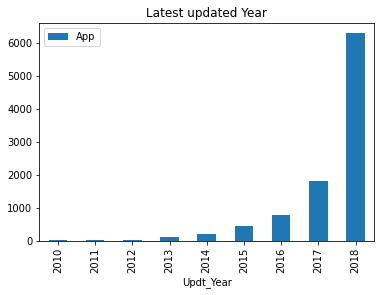

In [ ]:
#6.2 - Time Factor: Definition of the years since the application was last time updated.

def define_app_support(df_a):
    df = df_a
    df_a['Upd_Delay'] = df['Last_Updated'].apply(maint_del).astype(int)
    df_a['Updt_Year'] = df['Last_Updated'].apply(maint_year).astype(int)
    return df_a

#DEFINTION OF THE DATASET TO BE USED FUTHER - Paid, Free, Full set
combined_dataset_dated = define_app_support(enumerated_dataset)
#combined_dataset_dated_paid = define_app_support(enumerated_dataset)
#combined_dataset_dated_free = define_app_support(enumerated_dataset)

dataset_updates = combined_dataset_dated.groupby(['Updt_Year']).count()
dataset_updates.plot(y='App', use_index=True, title='Latest updated Year', kind='bar')
#dataset_updates

#FIX DATASET Y-2 exclusion